# Datos Faltantes

In [135]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
# Cargar el conjunto de datos
diabetes = load_diabetes(as_frame=True)
data = diabetes.data
data['target'] = diabetes.target

In [137]:
data.sample(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
346,0.005383,0.050680,0.017506,0.032201,0.127771,0.127390,-0.021311,0.071210,0.062578,0.015491,139.0
385,0.023546,0.050680,-0.019140,0.049415,-0.063487,-0.061125,0.004460,-0.039493,-0.025953,-0.013504,219.0
300,0.016281,-0.044642,0.073552,-0.041235,-0.004321,-0.013527,-0.013948,-0.001116,0.042897,0.044485,275.0
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207,215.0
42,-0.060003,0.050680,-0.010517,-0.014863,-0.049727,-0.023547,-0.058127,0.015858,-0.009919,-0.034215,61.0
311,0.096197,-0.044642,0.040140,-0.057313,0.045213,0.060690,-0.021311,0.036154,0.012551,0.023775,180.0
200,0.056239,-0.044642,-0.057941,-0.007977,0.052093,0.049103,0.056003,-0.021412,-0.028323,0.044485,158.0
271,0.038076,0.050680,0.008883,0.042529,-0.042848,-0.021042,-0.039719,-0.002592,-0.018114,0.007207,127.0
76,-0.030942,0.050680,0.028284,0.070072,-0.126781,-0.106845,-0.054446,-0.047981,-0.030748,0.015491,170.0


In [138]:
# Simular valores faltantes
np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado:

### 1. ¿Cuántos valores faltantes hay en cada columna?**

In [139]:
data.isna().sum()

age        0
sex        0
bmi       44
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64

### 2. Utiliza imputación simple (media) para llenar los valores faltantes de la columna 'bmi'.

In [140]:
bmi_mean_data = data.copy()
bmi_mean_data.isna().sum()

age        0
sex        0
bmi       44
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64

In [141]:

bmi_mean = bmi_mean_data["bmi"].mean(skipna=True)
bmi_mean_data["bmi"] = bmi_mean_data["bmi"].fillna(bmi_mean)
bmi_mean_data.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,NaN,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,-0.000205,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [142]:
bmi_mean_data.isna().sum()

age        0
sex        0
bmi        0
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64

### 3. Utiliza KNNImputer para imputar valores en las columnas 'bmi' y 'bp'. Compara los resultados con los de la imputación simple.

In [143]:
knn_imputer_data = data.copy()
knn_imputer_data.isna().sum()

age        0
sex        0
bmi       44
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64

In [144]:
imputer = KNNImputer(n_neighbors=5)
knn_imputer_data[["bmi", "bp"]] = imputer.fit_transform(knn_imputer_data[["bmi", "bp"]])
knn_imputer_data.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,0.003970,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,-0.025822,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [145]:
knn_imputer_data.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

### 4. Genera un histograma comparando los datos antes y después de la imputación en la columna 'bmi'.

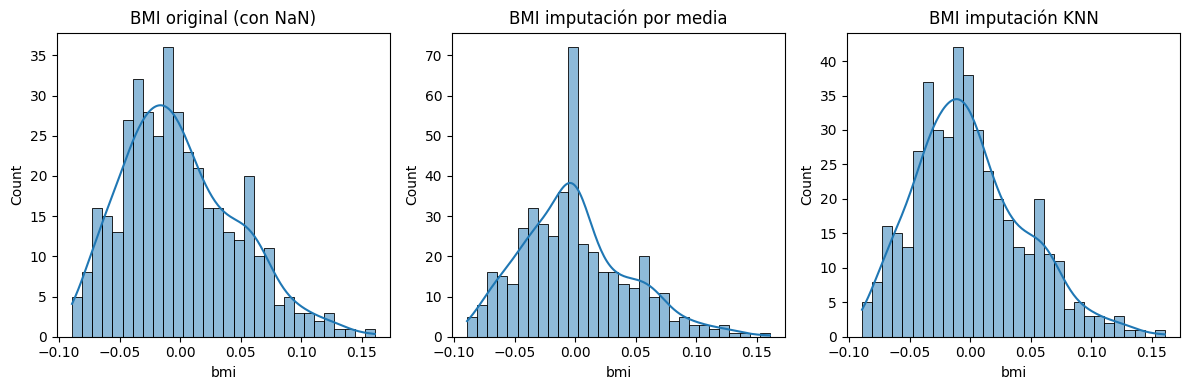

In [146]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.histplot(data["bmi"], bins=30, kde=True)
plt.title("BMI original (con NaN)")

plt.subplot(1,3,2)
sns.histplot(bmi_mean_data["bmi"], bins=30, kde=True)
plt.title("BMI imputación por media")

plt.subplot(1,3,3)
sns.histplot(knn_imputer_data["bmi"], bins=30, kde=True)
plt.title("BMI imputación KNN")

plt.tight_layout()
plt.show()
